The Iris dataset contains 150 observations across three species of Iris flowers: Setosa, Versicolor, and Virginica, with four features — Sepal Length, Sepal Width, Petal Length, and Petal Width. These features serve as the basis for identifying patterns and differentiating the species. Through descriptive statistics, visualization, and predictive modeling, this analysis aims to explore the distinct characteristics of each species and showcase how their features contribute to effective classification. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
sns.set(color_codes=True)


In [4]:
path = r'D:\iris\\'
df = pd.read_csv(path + 'iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.drop('Id', axis=1,inplace=True)
df.reset_index(drop=True, inplace=True)
df.rename(columns={
    'SepalLengthCm': 'Sepal_Length',
    'SepalWidthCm': 'Sepal_Width',
    'PetalLengthCm': 'Petal_Length',
    'PetalWidthCm': 'Petal_Width'
}, inplace=True)
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [143]:
df[df.duplicated()]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
34,4.9,3.1,1.5,0.1,Setosa
37,4.9,3.1,1.5,0.1,Setosa
142,5.8,2.7,5.1,1.9,Virginica


In [145]:
df.drop_duplicates(inplace=True)

In [147]:
df.isnull().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64

#### Insights
1. There are 4 numerical columns: SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm, and one categorical column: Species.
2. There are no null values in the dataset
3. There are 3 duplicated rows in the dataset
4. I will rename the Species values to remove the prefix "Iris-", since all flowers belong to the same genus, Iris.

In [149]:
df['Species'] = df['Species'].str.replace("Iris-setosa", "Setosa")
df['Species'] = df['Species'].str.replace("Iris-versicolor", "Versicolor")
df['Species'] = df['Species'].str.replace("Iris-virginica", "Virginica")

In [150]:
df['Species'].value_counts()

Species
Versicolor    50
Virginica     49
Setosa        48
Name: count, dtype: int64

The final dataset contains 50 versicolor, 49 Virginica and 48 setosa value counts. This indicates a very small imbalance across these classes

## Data Visualisation

#### Univariate Analysis

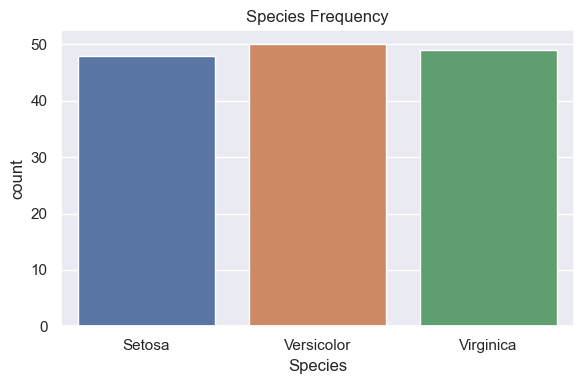

In [153]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'Species', data=df, hue='Species')
plt.title('Species Frequency')
plt.tight_layout()
plt.show()

This confirms the slight imbalance across the three classes of our clean dataset

#### Multivariate Analysis

In [156]:
mean_values = df.groupby('Species').mean().T.reset_index()
mean_values

Species,index,Setosa,Versicolor,Virginica
0,Sepal_Length,5.010417,5.936,6.604082
1,Sepal_Width,3.431250,2.770,2.979592
2,Petal_Length,1.462500,4.260,5.561224
3,Petal_Width,0.250000,1.326,2.028571


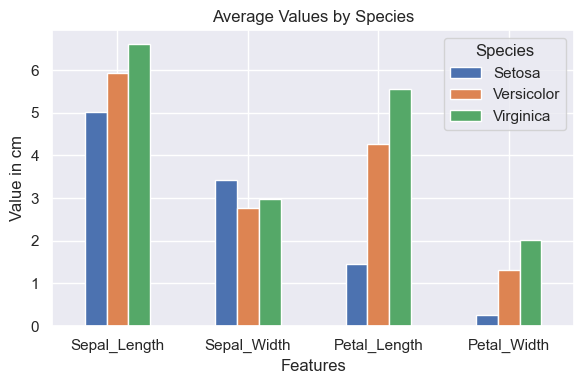

In [157]:
# Plot the mean values
mean_values.set_index('index').plot(kind='bar', figsize=(6,4))
plt.title('Average Values by Species')
plt.xlabel('Features')
plt.ylabel('Value in cm')
plt.xticks(rotation=0) 
plt.legend(title='Species', loc='upper right')
plt.tight_layout()
plt.show()

**Insights**
1. Sepal Length: Virginica has the largest sepal length on average, followed by Versicolor, then Setosa.
2. Sepal Width: Setosa has the widest sepals on average, while Virginica and Versicolor are relatively close in width.
3. Petal Length: Virginica has the longest petals, followed by Versicolor, then Setosa.
4. Petal Width: Similar to petal length, Virginica has the widest petals, followed by Versicolor, then Setosa
Therefore, **Virginica** is the longest flower, while **Setosa** is the shortest flower.

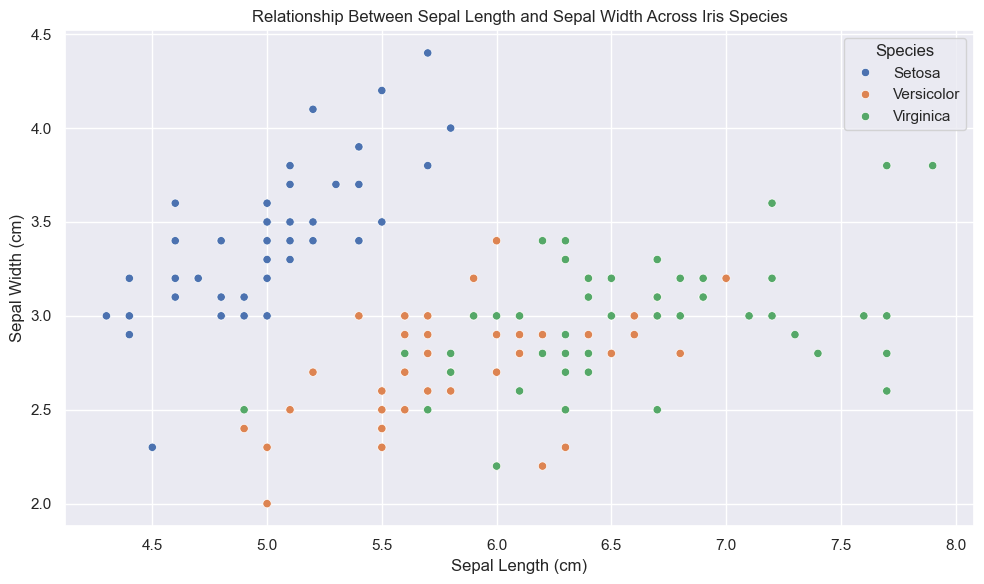

In [159]:
# Scatterplot: Sepal Length vs Sepal Width
plt.figure(figsize = (10,6))
sns.scatterplot(df, x = "Sepal_Length", y="Sepal_Width", hue="Species")
plt.title('Relationship Between Sepal Length and Sepal Width Across Iris Species')
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.tight_layout()
plt.show()


#### Insights
1. The setosa species has smaller sepal lengths, between 4.0 and 5.5cm, and larger sepal widths, between 3.0 and 4.5 cm
2. The vesicolor species has sepal lengths mostly between 5.0 and 7.0 cm and sepal widths between 2.0 and 3.5 cm.
3. The virginica species has the largest sepal lengths, between 6 and 8 cm, and sepal widths between 2.0 and 3.5 cm.

The correlation between Sepal length and sepal width is -0.109369, which indicates a very weak negative correlation. Since it is close to 0, there is little to no linear relationship between these two variables.

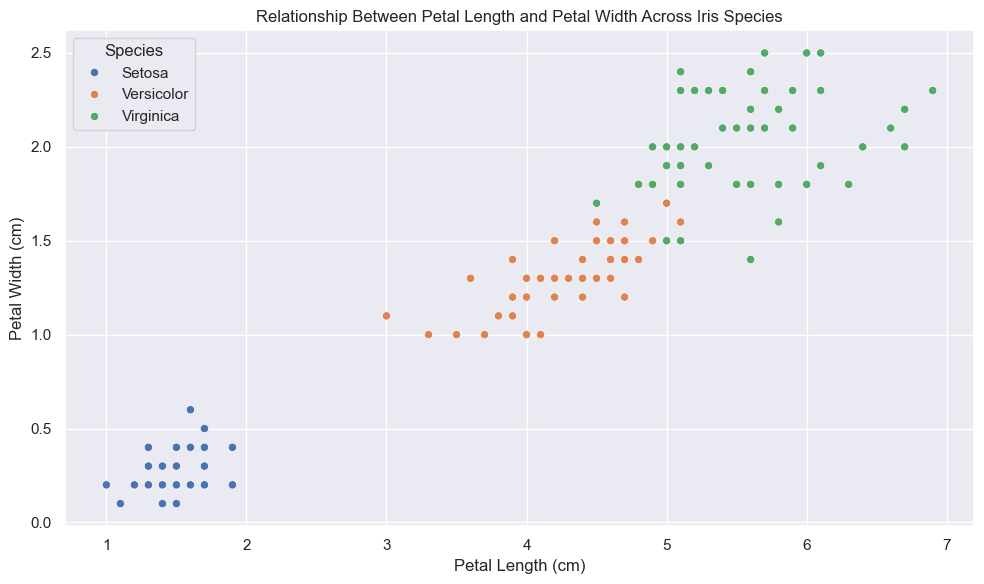

In [161]:
# Scatterplot: Petal Length vs. Petal Width
plt.figure(figsize = (10,6))
sns.scatterplot(df, x = "Petal_Length", y="Petal_Width", hue="Species")
plt.title('Relationship Between Petal Length and Petal Width Across Iris Species')
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.tight_layout()
plt.show()


#### Insights
1. Setosa species have the smallest petal length as well as petal width
2. Versicolor species have average petal length and petal width
3. Virginica species have the highest petal length as well as petal width

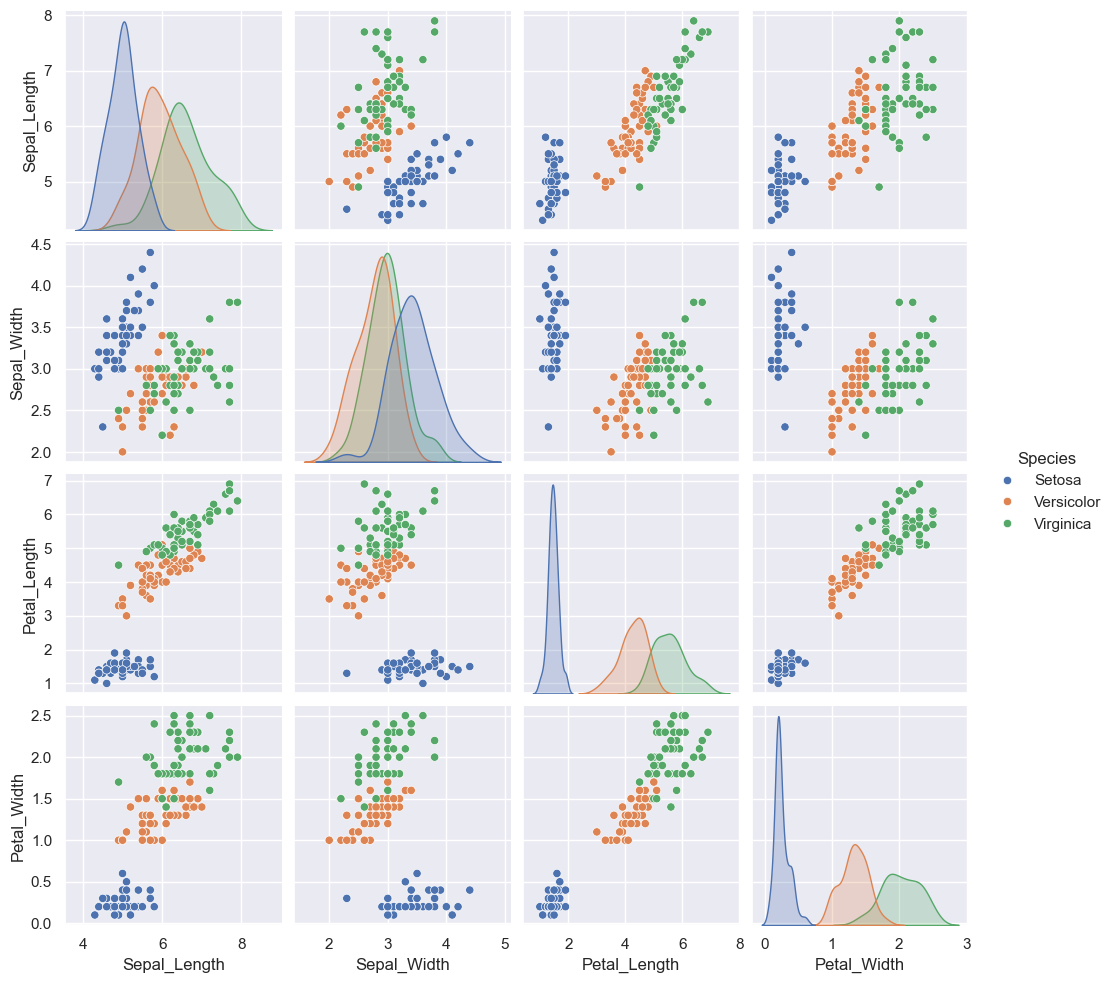

In [204]:

sns.pairplot(df, hue='Species')
#plt.tight_layout()
plt.show()

From the scatter plots above,the three classes appear relatively well separated using sepal and petal measurements.

## Model Selection and Evaluation

In [213]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [167]:
#Define X and y
data = df.copy()
X = data.drop('Species', axis=1)
y = data['Species']

In [168]:
print(X.shape)
print(y.shape)

(147, 4)
(147,)


In [169]:
X_train, X_test,y_train,  y_test = train_test_split(X, y, random_state=0, test_size=0.2)

**The class proportions are almost equal, so a random split will not significantly alter their distribution.** 

### K-Nearest Neighbors

To predict a new data point, the K-Nearest Neighbors (KNN) algorithm identifies the closest point in the training set. It then assigns the label of this nearest point to the new data point.

In [171]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)
y_pred1 = knn_model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred1)}")


Model Accuracy: 0.9666666666666667


The knn model achieved an accuracy of 96.67%, thus it performs relatively well.
I will conduct cross validation to evaluate performance on different subsets of the data.

In [173]:

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=5)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {np.mean(scores)}")

Cross-Validation Scores: [0.96666667 1.         0.93103448 0.96551724 1.        ]
Mean Accuracy: 0.9726436781609195


The KNN classifier is performing very well across different folds, with a mean accuracy of approximately 97.26%. This indicates that the model is both accurate and consistent.

### Logistic Regression 

In [208]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)


In [177]:
print(f"Model Accuracy: {accuracy_score(y_test, y_pred)}")

Model Accuracy: 1.0


The logistic model performs much better than the knn Classifier, achieving a perfect accuracy of 100%. I will evaluate the performance of the logistic models by comparing predictions to actual results using the confusion matrix

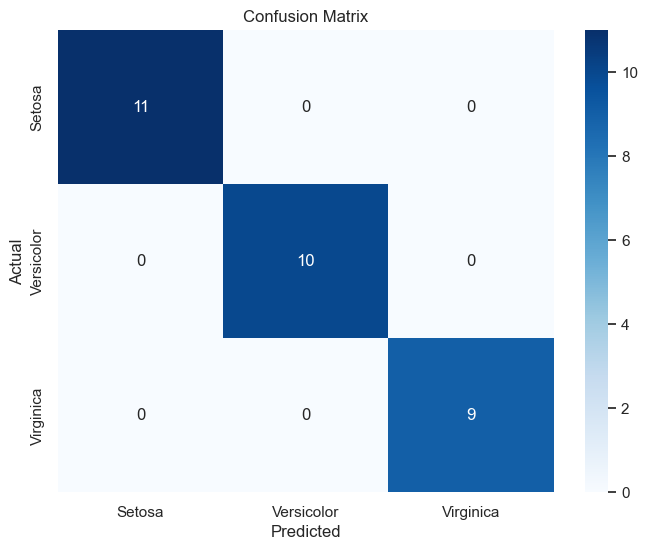

In [178]:
cm = confusion_matrix(y_test, y_pred) 
plt.figure(figsize=(8, 6)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lr_model.classes_, yticklabels=lr_model.classes_) 
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.title('Confusion Matrix') 
plt.show()

The model has perfectly classified all instances, resulting in no false positives or false negatives.

In [215]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      1.00      1.00        10
   Virginica       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



- Precision = 1.00: No false positives.
- Recall = 1.00: No false negatives.
- F1-score = 1.00: Perfect balance between precision and recall.
- Support: The number of actual instances per class (Setosa: 11, Versicolor: 10, Virginica: 9).
- Accuracy = 1.00: Every sample was classified correctly.
  
The classification report indicates a perfect performance. While this is okay, it could indicate overfitting.